### Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots 


## Import Libraries

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
movies = pd.read_csv('my_movies.csv')
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
# to get the information of the datafile
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [4]:
# summarizing the datafile
movies.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# to check the null values of the data
movies.isnull().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [6]:
print("Dimensions -",movies.shape)
print("Column names -",movies.columns)

Dimensions - (10, 15)
Column names - Index(['V1', 'V2', 'V3', 'V4', 'V5', 'Sixth Sense', 'Gladiator', 'LOTR1',
       'Harry Potter1', 'Patriot', 'LOTR2', 'Harry Potter2', 'LOTR',
       'Braveheart', 'Green Mile'],
      dtype='object')


### Pre-Processing 
As the data is not in the Transaction Formation, We are using Transaction Encoders 
But, since the columns are present with encoded values from 5th column, we need not to apply one-hot encoding of the dataset. 

In [7]:
pd.set_option('display.max_columns',None)
mv = pd.get_dummies(movies)
mv.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [8]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Sixth Sense       10 non-null     int64
 1   Gladiator         10 non-null     int64
 2   LOTR1             10 non-null     int64
 3   Harry Potter1     10 non-null     int64
 4   Patriot           10 non-null     int64
 5   LOTR2             10 non-null     int64
 6   Harry Potter2     10 non-null     int64
 7   LOTR              10 non-null     int64
 8   Braveheart        10 non-null     int64
 9   Green Mile        10 non-null     int64
 10  V1_Gladiator      10 non-null     uint8
 11  V1_Harry Potter1  10 non-null     uint8
 12  V1_LOTR1          10 non-null     uint8
 13  V1_Sixth Sense    10 non-null     uint8
 14  V2_Harry Potter2  10 non-null     uint8
 15  V2_LOTR           10 non-null     uint8
 16  V2_LOTR1          10 non-null     uint8
 17  V2_LOTR2          10 non-null     uint

In [9]:
print("Dimensions -",movies.shape)
print("Column names -",movies.columns)

Dimensions - (10, 15)
Column names - Index(['V1', 'V2', 'V3', 'V4', 'V5', 'Sixth Sense', 'Gladiator', 'LOTR1',
       'Harry Potter1', 'Patriot', 'LOTR2', 'Harry Potter2', 'LOTR',
       'Braveheart', 'Green Mile'],
      dtype='object')


### Apriori Algorithm

- Algorithm with 10% of the support and 

In [10]:
#To print the frequent itemsets
fq_itm = apriori(mv,min_support=0.1, use_colnames=True)
fq_itm

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Harry Potter1, Green Mile, V4_Green Mile, Six..."
1393,0.1,"(LOTR2, Green Mile, V4_Green Mile, Sixth Sense..."
1394,0.1,"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi..."
1395,0.1,"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi..."


In [11]:
# To print Association Rules 
# 70% Confodence ( min_threshold)
rules = association_rules(fq_itm,metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
...,...,...,...,...,...,...,...,...,...,...
64247,(V1_Sixth Sense),"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64248,(V2_LOTR1),"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
64249,(V3_Harry Potter1),"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
64250,(LOTR1),"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


In [12]:
# If Lift ratio > 1, it is a good influential rule in selecting the association rule
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
64247,(V1_Sixth Sense),"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
64248,(V2_LOTR1),"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
64249,(V3_Harry Potter1),"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
64250,(LOTR1),"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


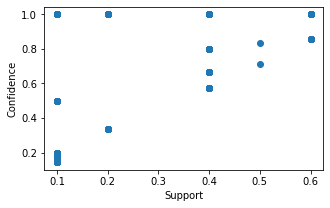

In [13]:
# Visualisation Of the Obtained Rules
plt.figure(figsize=(5,3))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### Algorithm with 5% support and 90% confidence

In [14]:
# To print the frequent itemsets
# 5% support (min_support)
fq_itm1 = apriori(mv,min_support=0.05,use_colnames=True)
fq_itm1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Harry Potter1, Green Mile, V4_Green Mile, Six..."
1393,0.1,"(LOTR2, Green Mile, V4_Green Mile, Sixth Sense..."
1394,0.1,"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi..."
1395,0.1,"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi..."


In [15]:
# To print the Association Rules
# 90% Confidence (min_support)
rules1 = association_rules(fq_itm1,metric='lift',min_threshold=0.9)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
64211,(V1_Sixth Sense),"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
64212,(V2_LOTR1),"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
64213,(V3_Harry Potter1),"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
64214,(LOTR1),"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


In [16]:
# If lift ratio > 1, it is a good influential rule in selecting the associated transactions
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
64211,(V1_Sixth Sense),"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
64212,(V2_LOTR1),"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
64213,(V3_Harry Potter1),"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
64214,(LOTR1),"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


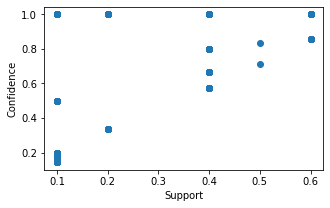

In [17]:
# Visualisation of the obtained rules
plt.figure(figsize=(5,3))
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### Algorithm with 7% support and 100% confidence

In [18]:
# To print the frequent itemsets
# 7% support (min_support)
fq_itm2 = apriori(mv,min_support=0.07,use_colnames=True)
fq_itm2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Harry Potter1, Green Mile, V4_Green Mile, Six..."
1393,0.1,"(LOTR2, Green Mile, V4_Green Mile, Sixth Sense..."
1394,0.1,"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi..."
1395,0.1,"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi..."


In [19]:
# To print the Association Rules
# 100% Confidence (min_support)
rules2 = association_rules(fq_itm2,metric='lift',min_threshold=1.0)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
64211,(V1_Sixth Sense),"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
64212,(V2_LOTR1),"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
64213,(V3_Harry Potter1),"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
64214,(LOTR1),"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


In [20]:
# If lift ratio > 1, it is a good influential rule in selecting the associated transactions
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
64211,(V1_Sixth Sense),"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
64212,(V2_LOTR1),"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
64213,(V3_Harry Potter1),"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
64214,(LOTR1),"(Harry Potter1, LOTR2, Green Mile, V4_Green Mi...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


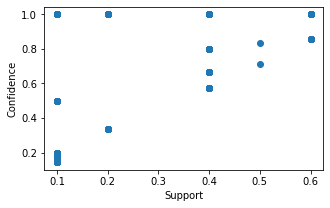

In [21]:
# Visualisation of the obtained rules
plt.figure(figsize=(5,3))
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()